# Considerações
Originalmente, este projeto havia sido realizado em Octave\MatLab, e portanto, foi necessária uma "tradução" de suas funções originais. Por este motivo, a correspondencia entre os gráficos aqui erados e aqueles apresentados no projeto não é de 100%, por quesões estéticas e algumas dificuldades na adaptação do código. De qualquer forma, abaixo estão dispostos os resultados obtidos, utilizando do método de Runge-Kutta para estudar numéricamente o mergulho em um buraco negro. 

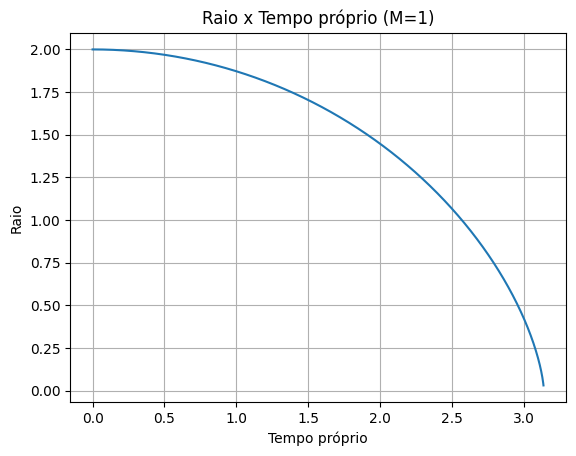

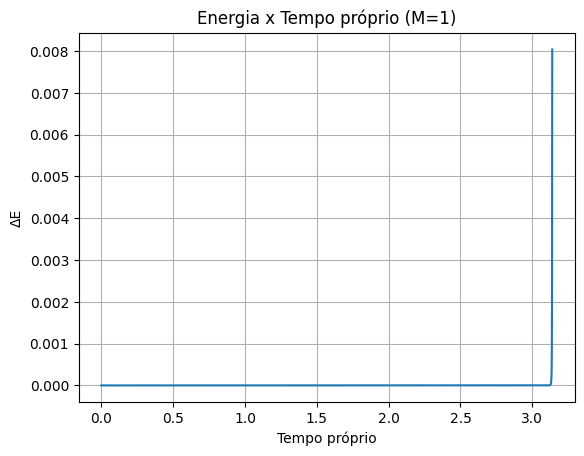

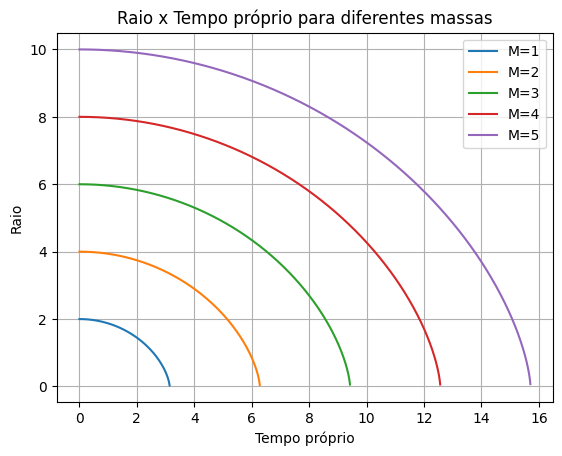

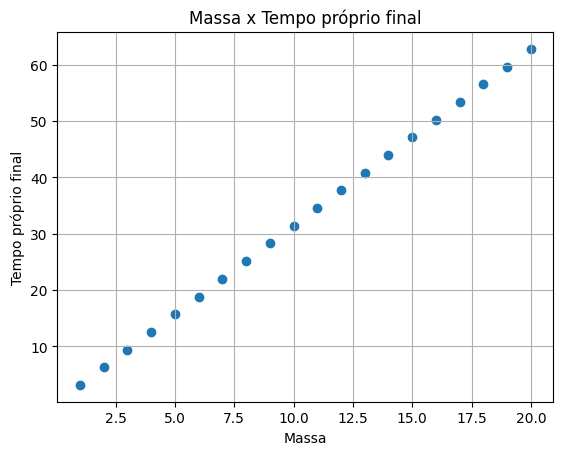

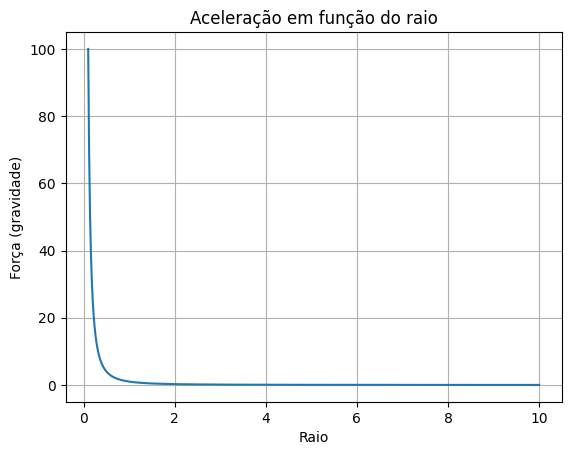

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# Funções auxiliares
# ===============================

def U_func(u, w, M):
    return w

def W_func(u, w, M):
    return (2 * (w**2) / u) + M * u**4

def V_func(u, w, M):
    return w

def P_func(u, w, M):
    return 2*w/u + 3*M*w*(u**2) + M*(u**4) + 2*(M**2)*(u**5)

def metrica(r0, v0, r1, v1, M):
    delta_v = v1 - v0
    delta_r = r1 - r0
    r_medio = (r0 + r1) / 2
    ds2 = -(1 - 2*M/r_medio) * (delta_v**2) + 2*delta_v*delta_r
    return ds2


# ===============================
# Runge-Kutta: mergulho
# ===============================

def mergulho(r0, v0, h, epsilon, M):
    u0 = 1/r0
    w0 = 0.0

    u_valores = [u0]
    w_valores = [w0]
    tau_valores = [0.0]
    tau = 0.0

    h2 = h/2
    p1 = h/6
    p2 = 2*p1
    maxU = 1/epsilon

    u, w = u0, w0
    K0 = ((-w0/(u0**2))**2) - 2*M*u0
    K_valores = [K0]
    K_anterior = K0
    tau_final = 0

    while u < maxU:
        # Energia
        K = ((-w/(u**2))**2) - 2*M*u
        if abs((K/K0) - 1) >= 0.01:
            tau_final = tau
            K = K_anterior
            break
        K_anterior = K

        # Runge-Kutta
        du = U_func(u, w, M)
        dw = W_func(u, w, M)

        d1u = U_func(u + h2*du, w + h2*dw, M)
        d1w = W_func(u + h2*du, w + h2*dw, M)

        d2u = U_func(u + h2*d1u, w + h2*d1w, M)
        d2w = W_func(u + h2*d1u, w + h2*d1w, M)

        d3u = U_func(u + h*d2u, w + h*d2w, M)
        d3w = W_func(u + h*d2u, w + h*d2w, M)

        # Atualiza
        u = u + (p1*du + p2*(d1u+d2u) + p1*d3u)
        w = w + (p1*dw + p2*(d1w+d2w) + p1*d3w)
        tau = tau + h

        # Armazena
        u_valores.append(u)
        w_valores.append(w)
        tau_valores.append(tau)
        K_valores.append(K)

    r_valores = 1/np.array(u_valores)
    v_valores = -np.array(w_valores) / (np.array(u_valores)**2)
    r_final = r_valores[-1]

    return r_valores, v_valores, r_final, np.array(tau_valores), tau_final, np.array(K_valores)


# ===============================
# Script principal
# ===============================

if __name__ == "__main__":
    # parâmetros
    v0 = 0.0
    h = 0.001
    epsilon = 1e-3

    # -----------------------------
    # Figura 1: Raio x tempo próprio (M=1)
    r0 = 2*1
    r_vals, v_vals, r_final, tau_vals, tau_final, K_vals = mergulho(r0, v0, h, epsilon, 1)
    plt.figure()
    plt.plot(tau_vals, r_vals)
    plt.xlabel("Tempo próprio")
    plt.ylabel("Raio")
    plt.title("Raio x Tempo próprio (M=1)")
    plt.grid()

    # -----------------------------
    # Figura 2: Energia x tempo próprio (M=1)
    plt.figure()
    plt.plot(tau_vals, K_vals - K_vals[0])  # variação da energia
    plt.xlabel("Tempo próprio")
    plt.ylabel("ΔE")
    plt.title("Energia x Tempo próprio (M=1)")
    plt.grid()

    # -----------------------------
    # Figura 3: Variação de massa
    plt.figure()
    for M in [1, 2, 3, 4, 5]:
        r0 = 2*M
        r_vals, v_vals, r_final, tau_vals, tau_final, K_vals = mergulho(r0, v0, h, epsilon, M)
        plt.plot(tau_vals, r_vals, label=f"M={M}")
    plt.xlabel("Tempo próprio")
    plt.ylabel("Raio")
    plt.title("Raio x Tempo próprio para diferentes massas")
    plt.legend()
    plt.grid()

    # -----------------------------
    # Figura 4: Massa vs tempo final
    massas = np.arange(1, 21, 1)
    tempos_finais = []
    for M in massas:
        r0 = 2*M
        r_vals, v_vals, r_final, tau_vals, tau_final, K_vals = mergulho(r0, v0, h, epsilon, M)
        tempos_finais.append(tau_vals[-1])
    plt.figure()
    plt.scatter(massas, tempos_finais)
    plt.xlabel("Massa")
    plt.ylabel("Tempo próprio final")
    plt.title("Massa x Tempo próprio final")
    plt.grid()

    # -----------------------------
    # Figura 5: Aceleração (força) x Raio
    raios = np.linspace(0.1, 10, 500)
    forcas = 1/(raios**2)  # newtoniano
    plt.figure()
    plt.plot(raios, forcas)
    plt.xlabel("Raio")
    plt.ylabel("Força (gravidade)")
    plt.title("Aceleração em função do raio")
    plt.grid()

    plt.show()
